# Support Vector Machine:

   Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane

# Why we use SVM?

SVM can work very well if we can find the right kernel and if we can find a kernel designed for a specific domain, it can outperform most other techniques and give phenomenal results.  However, just to keep things simple, we will stick with the basic ones = a linear kernel, a polynomial kernel and an RBF kernel which comes right out of the box in sklearn.  They hyperplane is affected by only the support vectors thus outliers have less impact

# Import the required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
import pickle

# Import the dataset

In [2]:
data=pd.read_csv("New Stock Data.csv")

# Dataset informations

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89929 entries, 0 to 89928
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       89929 non-null  object 
 1   Open       89929 non-null  float64
 2   High       89929 non-null  float64
 3   Low        89929 non-null  float64
 4   Close      89929 non-null  float64
 5   Adj Close  89929 non-null  float64
 6   Volume     89929 non-null  float64
 7   Symbol     89929 non-null  object 
dtypes: float64(6), object(2)
memory usage: 5.5+ MB


In [4]:
data.shape

(89929, 8)

# Drop Symbol column and add two more column using Close column

In [5]:
data = data.drop(['Symbol'], axis = 1)

In [6]:
data["Date"]=pd.to_datetime(data['Date'])    

In [7]:
data['Change %']= data['Close'].pct_change()*100

In [8]:
data['Change %'] = data['Change %'].fillna(0)

In [9]:
data['Return'] = data['Change %'].apply(lambda x: 1 if x >= 0 else 0)

In [10]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Change %,Return
0,2019-08-02,48.599998,48.930000,48.470001,48.910000,46.454433,906700.0,0.000000,1
1,2019-11-02,48.680000,48.810001,48.419998,48.660000,46.216980,1001200.0,-0.511143,0
2,2019-12-02,48.990002,49.480000,48.830002,49.400002,46.919834,868600.0,1.520760,1
3,2019-02-13,49.040001,49.279999,49.020000,49.090000,46.625393,868900.0,-0.627533,0
4,2019-02-20,49.840000,50.009998,49.549999,49.700001,47.204773,1063800.0,1.242617,1
...,...,...,...,...,...,...,...,...,...
89924,2022-02-02,15.300000,15.300000,13.760000,13.870000,13.870000,65500.0,-9.759271,0
89925,2022-03-02,13.500000,14.000000,13.310000,13.640000,13.640000,39500.0,-1.658252,0
89926,2022-04-02,13.620000,14.920000,13.530000,14.720000,14.720000,50700.0,7.917888,1
89927,2022-07-02,14.590000,16.160000,14.470000,14.960000,14.960000,74000.0,1.630433,1


In [11]:
data=data.set_index(["Date"])

In [12]:
data

,Open,High,Low,Close,Adj Close,Volume,Change %,Return
Date,,,,,,,,
2019-08-02,48.599998,48.930000,48.470001,48.910000,46.454433,906700.0,0.000000,1
2019-11-02,48.680000,48.810001,48.419998,48.660000,46.216980,1001200.0,-0.511143,0
2019-12-02,48.990002,49.480000,48.830002,49.400002,46.919834,868600.0,1.520760,1
2019-02-13,49.040001,49.279999,49.020000,49.090000,46.625393,868900.0,-0.627533,0
2019-02-20,49.840000,50.009998,49.549999,49.700001,47.204773,1063800.0,1.242617,1
...,...,...,...,...,...,...,...,...
2022-02-02,15.300000,15.300000,13.760000,13.870000,13.870000,65500.0,-9.759271,0
2022-03-02,13.500000,14.000000,13.310000,13.640000,13.640000,39500.0,-1.658252,0
2022-04-02,13.620000,14.920000,13.530000,14.720000,14.720000,50700.0,7.917888,1


# Assume the dataset into Dependent (Y) and Independent(X)

In [13]:
X = data.drop(['Change %', 'Return'], axis = 1)
Y = data['Return']

# Split the dataset into training set and test set

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(62950, 6)
(26979, 6)
(62950,)
(26979,)


# Normalize the dataset

In [16]:
sc = StandardScaler()
normed_x_train = pd.DataFrame(sc.fit_transform(x_train), columns = X.columns)
normed_x_test = pd.DataFrame(sc.transform(x_test), columns = X.columns)

In [17]:
normed_x_train

,Open,High,Low,Close,Adj Close,Volume
0,2.360548,2.357222,2.362233,2.359987,2.358087,0.015668
1,0.298813,0.299564,0.341798,0.302493,0.304398,0.754288
2,1.359816,1.417442,1.441932,1.427430,1.430527,1.152883
3,-0.131778,-0.141704,-0.143621,-0.163786,-0.162374,0.540944
4,0.961805,0.929264,0.887964,0.861701,0.864198,-0.277183
...,...,...,...,...,...,...
62945,0.440805,0.399213,0.451589,0.445963,0.448020,0.450306
62946,-0.585175,-0.577671,-0.585012,-0.601805,-0.600857,-0.933115
62947,-0.034040,-0.038079,-0.054451,0.001966,0.003553,-0.606076
62948,2.125433,2.131951,2.227186,2.218690,2.222625,1.109154


# Fit the Support Vector Machine Classifier Model

In [18]:
from sklearn.svm import SVC
classifier=SVC(kernel = 'linear')
classifier.fit(normed_x_train, y_train)

SVC(kernel='linear')

In [19]:
classifier_predict = classifier.predict(normed_x_test)
classifier_predict

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [20]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, classifier_predict))

Accuracy: 0.8634493494940509


# Cross validation and confusion matrix

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, classifier_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, classifier_predict))

=== Confusion Matrix ===
[[ 9374  2715]
 [  969 13921]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     12089
           1       0.84      0.93      0.88     14890

    accuracy                           0.86     26979
   macro avg       0.87      0.86      0.86     26979
weighted avg       0.87      0.86      0.86     26979



# Collect future days from predicted values and plot

In [29]:
predictions = pd.DataFrame({"Predictions": classifier_predict}, index=pd.date_range(start='2022-3-21', periods=len(classifier_predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:366])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:31])
onemonth_df.to_csv("one-month-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

# (i) One Year Prediction

Buy price and date
            Predictions
Unnamed: 0             
2022-03-24            0
2022-04-01            0
2022-04-02            0
2022-04-03            0
2022-04-05            0
...                 ...
2023-03-05            0
2023-03-08            0
2023-03-11            0
2023-03-12            0
2023-03-15            0

[129 rows x 1 columns]
Sell price and date
            Predictions
Unnamed: 0             
2022-03-21            1
2022-03-22            1
2022-03-23            1
2022-03-25            1
2022-03-26            1
...                 ...
2023-03-17            1
2023-03-18            1
2023-03-19            1
2023-03-20            1
2023-03-21            1

[237 rows x 1 columns]


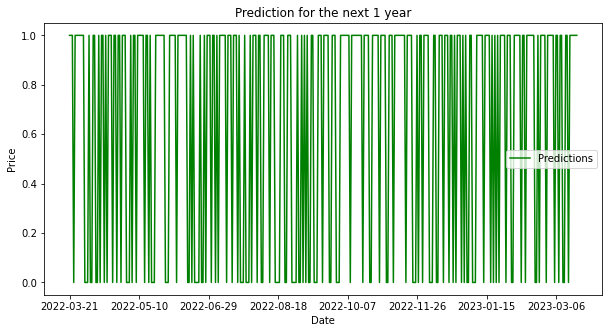

In [30]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
oneyear_df_pred.set_index("Unnamed: 0", inplace=True)


buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Prediction for the next 1 year", color="Green")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [31]:
oneyear_df_pred

,Predictions
Unnamed: 0,
2022-03-21,1
2022-03-22,1
2022-03-23,1
2022-03-24,0
2022-03-25,1
...,...
2023-03-17,1
2023-03-18,1
2023-03-19,1


# (ii) One Month Prediction

Buy price and date
            Predictions
Unnamed: 0             
2022-03-24            0
2022-04-01            0
2022-04-02            0
2022-04-03            0
2022-04-05            0
2022-04-06            0
2022-04-09            0
2022-04-10            0
2022-04-12            0
2022-04-15            0
2022-04-17            0
Sell price and date
            Predictions
Unnamed: 0             
2022-03-21            1
2022-03-22            1
2022-03-23            1
2022-03-25            1
2022-03-26            1
2022-03-27            1
2022-03-28            1
2022-03-29            1
2022-03-30            1
2022-03-31            1
2022-04-04            1
2022-04-07            1
2022-04-08            1
2022-04-11            1
2022-04-13            1
2022-04-14            1
2022-04-16            1
2022-04-18            1
2022-04-19            1
2022-04-20            1


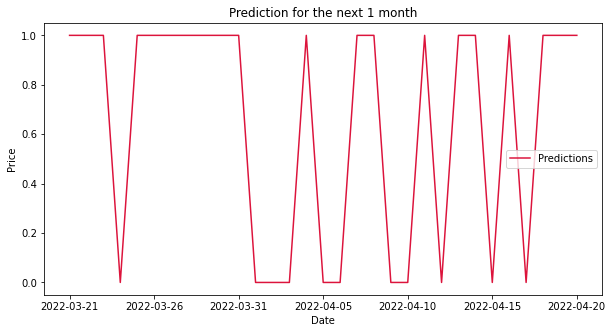

In [32]:
onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
onemonth_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), title="Prediction for the next 1 month", color="crimson")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# (iii) Five Days Prediction

Buy price and date
            Predictions
Unnamed: 0             
2022-03-24            0
Sell price and date
            Predictions
Unnamed: 0             
2022-03-21            1
2022-03-22            1
2022-03-23            1
2022-03-25            1


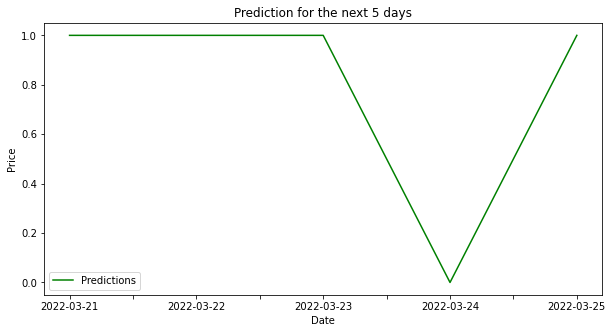

In [33]:
fivedays_df_pred = pd.read_csv("five-days-predictions.csv")
fivedays_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(fivedays_df_pred["Predictions"])
sell_price = max(fivedays_df_pred["Predictions"])
fivedays_buy = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == buy_price]
fivedays_sell = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)
fivedays_df_pred["Predictions"].plot(figsize=(10, 5), title="Prediction for the next 5 days", color="Green")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Save this SVM model:

In [34]:
pickle.dump(classifier, open("svm_model.pkl", "wb"))

# Conclusion:

 There are different approaches to solving these problems.
 
 By using Support Vector Machine, We are getting a accuracy 0.86, the accuracy is good so i predicted for the future days ( for 1 year, for 1 month, for 5 days).

                                                                                                Author : Santhosh Kumar M